In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Dataset/auto-mpg.csv')

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [ ]:
dataset.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140,3449,10.5,70,1,ford torino,17.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
#dataCleaning
#replace nilai ? dengan none
dataset.replace("?", np.nan, inplace=True)

dataset.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140,3449,10.5,70,1,ford torino,17.0


In [ ]:
dataset.isnull().sum()

cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
mpg             0
dtype: int64

ganti nilai nan dengan nilai rata-rata

In [ ]:
avg_hp=dataset['horsepower'].astype('float').mean(axis=0)

In [ ]:
dataset['horsepower'].replace(np.nan, avg_hp, inplace=True)

In [ ]:
dataset.isnull().sum().sort_values()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
mpg             0
dtype: int64

ubah data horsepower dari object menjadi int

In [ ]:
dataset[["horsepower"]] = dataset[["horsepower"]].astype("int")

In [ ]:
dataset.dtypes

cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
mpg             float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1e92c0208>,
      dtype=object)

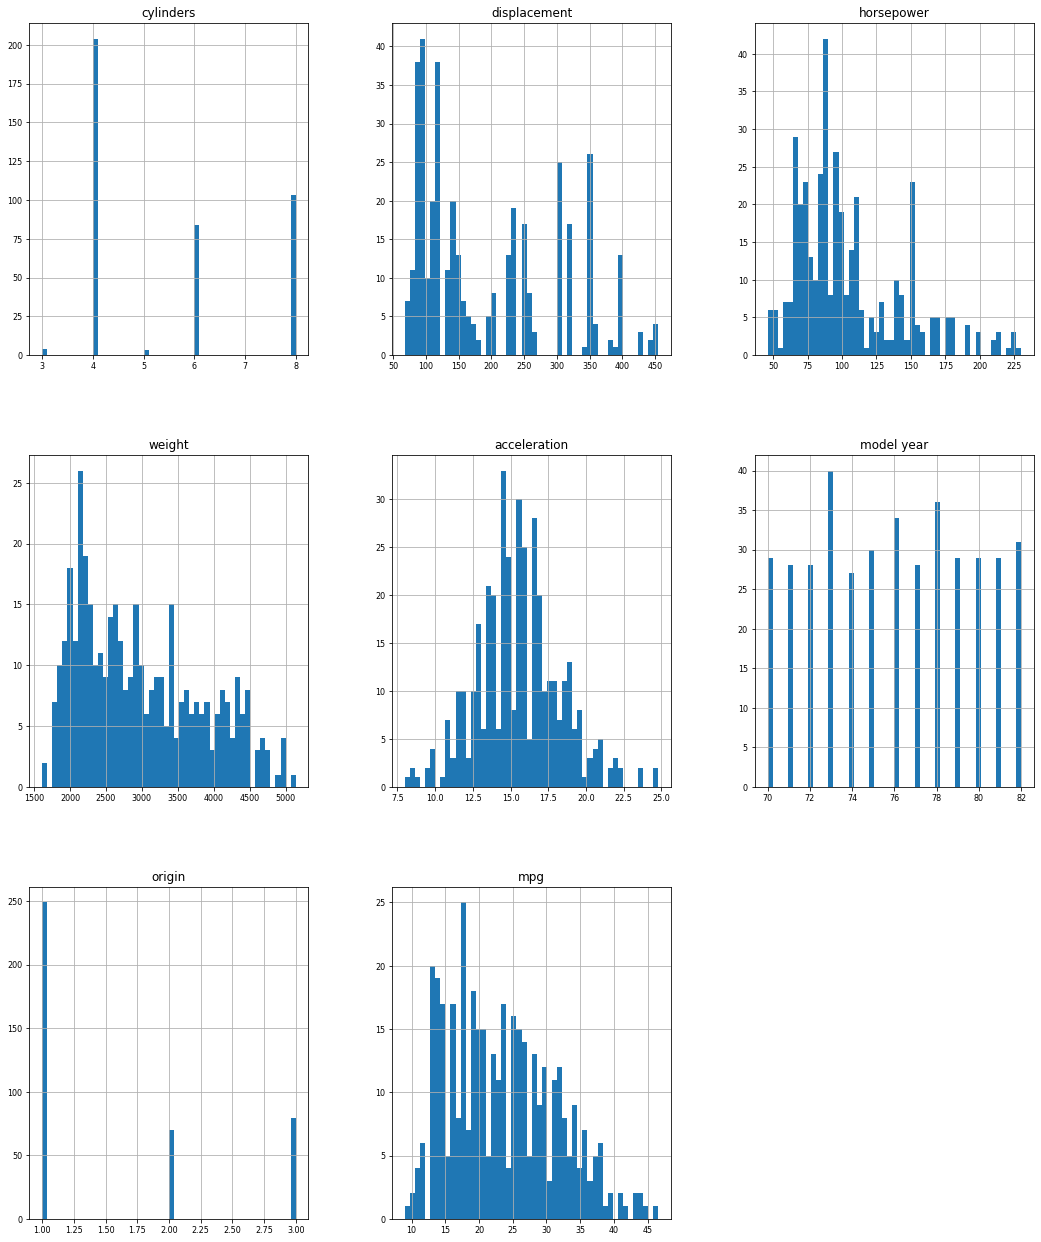

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
corr = dataset.corr()

corr

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
cylinders,1.000000,0.950721,0.839061,0.896017,-0.505419,-0.348746,-0.562543,-0.775396
displacement,0.950721,1.000000,0.893760,0.932824,-0.543684,-0.370164,-0.609409,-0.804203
horsepower,0.839061,0.893760,1.000000,0.860676,-0.684376,-0.411750,-0.453613,-0.771543
weight,0.896017,0.932824,0.860676,1.000000,-0.417457,-0.306564,-0.581024,-0.831741
acceleration,-0.505419,-0.543684,-0.684376,-0.417457,1.000000,0.288137,0.205873,0.420289
model year,-0.348746,-0.370164,-0.411750,-0.306564,0.288137,1.000000,0.180662,0.579267
origin,-0.562543,-0.609409,-0.453613,-0.581024,0.205873,0.180662,1.000000,0.563450
mpg,-0.775396,-0.804203,-0.771543,-0.831741,0.420289,0.579267,0.563450,1.000000


In [ ]:
dataset.corr()['mpg'][:-1]

cylinders      -0.775396
displacement   -0.804203
horsepower     -0.771543
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

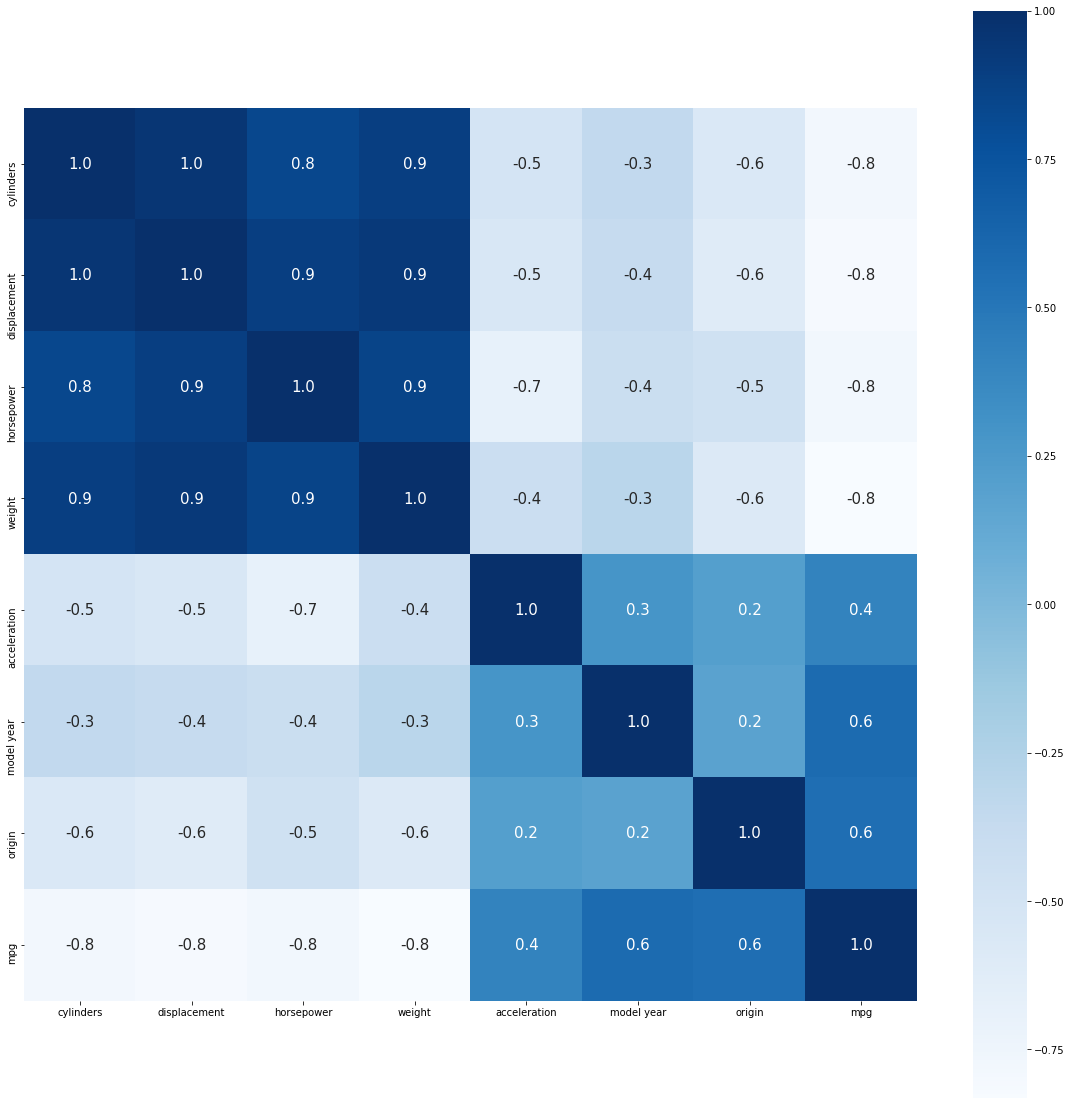

In [ ]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

## Linear Regression

### Feature Engineering

In [ ]:
label = dataset['mpg']
features = dataset.drop(['mpg','car name'], axis=1)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.20826660169611802
MAE (Mean Absolute Error) 0.3684271684436153
r^2 score 0.792478802889181
RMSE (Root Mean Squared Error 0.4563623578869296


### Deep Learning

In [ ]:
# Based on: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=7, kernel_initializer='normal', activation='relu')) # 13 neuron, sesuai dengan 13 features
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
40/40 [==============================] - 0s 4ms/step - loss: 0.9402 - val_loss: 0.8721
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.7398 - val_loss: 0.5948
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4402 - val_loss: 0.3299
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2593 - val_loss: 0.2561
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2142 - val_loss: 0.2406
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1968 - val_loss: 0.2253
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1864 - val_loss: 0.2138
Epoch 8/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1736 - val_loss: 0.2028
Epoch 9/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1653 - val_loss: 0.1976
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1571 - val_loss: 0.1901
Epoch 11/50
40/40 [

In [ ]:
predictions = model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.15137977641173225
MAE (Mean Absolute Error) 0.29622126680661565
r^2 score 0.8491620251951499
RMSE (Root Mean Squared Error 0.3890755407523483


## Deeper Model

In [ ]:
deeper_model = Sequential()
deeper_model.add(Dense(13, input_dim=7, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
40/40 [==============================] - 0s 4ms/step - loss: 0.9934 - val_loss: 0.9927
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.9436 - val_loss: 0.9000
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.7696 - val_loss: 0.7114
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.6127 - val_loss: 0.6285
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.5411 - val_loss: 0.5751
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4940 - val_loss: 0.5305
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4503 - val_loss: 0.4734
Epoch 8/50
40/40 [==============================] - 0s 2ms/step - loss: 0.3701 - val_loss: 0.3588
Epoch 9/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2479 - val_loss: 0.2387
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1598 - val_loss: 0.1861
Epoch 11/50
40/40 [

In [ ]:
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.15392798058785853
MAE (Mean Absolute Error) 0.2992501542949416
r^2 score 0.8466229412671177
RMSE (Root Mean Squared Error 0.3923365654484151


### Wider model

In [ ]:
wider_model = Sequential()
wider_model.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.8402 - val_loss: 0.7020
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5085 - val_loss: 0.3575
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2614 - val_loss: 0.2491
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2041 - val_loss: 0.2300
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1886 - val_loss: 0.2166
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1774 - val_loss: 0.2033
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1658 - val_loss: 0.1953
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1555 - val_loss: 0.1888
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1474 - val_loss: 0.1835
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.1775
Epoch 11/

In [ ]:
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.1466409413852757
MAE (Mean Absolute Error) 0.28628237433280435
r^2 score 0.8538838995119731
RMSE (Root Mean Squared Error 0.38293725515451704


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [ ]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,val_loss,epoch
0,0.840217,0.702024,0
1,0.508492,0.357527,1
2,0.261372,0.249108,2
3,0.204094,0.230003,3
4,0.188560,0.216635,4
...,...,...,...
95,0.094402,0.151479,95
96,0.094310,0.158794,96
97,0.093954,0.147210,97
98,0.094383,0.152252,98


In [ ]:
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
83,0.095817,0.146136,83
40,0.105565,0.146148,40
45,0.100963,0.146600,45
99,0.092723,0.146641,99
76,0.095510,0.146788,76
...,...,...,...
4,0.188560,0.216635,4
3,0.204094,0.230003,3
2,0.261372,0.249108,2
1,0.508492,0.357527,1


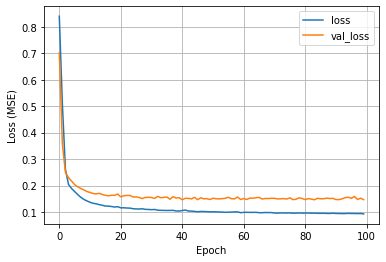

In [ ]:
plot_loss(history) # epoch vs loss graph #untuk wider

LINEAR REGRESSION

r^2 score : 0.792478802889181


RMSE : 0.4563623578869296

DEEP LEARNING

r^2 score : 0.8491620251951499


RMSE : 0.3890755407523483

DEEPER MODEL

r^2 score : 0.8466229412671177


RMSE : 0.3923365654484151

WIDER MODEL

r^2 score : 0.8538838995119731


RMSE : 0.38293725515451704

Kesimpulan : nilai akurasi yang paling tinggi didapatkan pada Wider model yaitu sebesar 85.38% dan nilai rmse nya juga kecil 0.38